In [1]:

# Dependencies
import gempy as gp
import numpy as np
import gstools as gs
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp
from gempy.assets import kriging

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../input/Santos_Basin/sismicas_interpretadas/horizontes_interpolados/itapema/"
nome_modelo = "Santos-Inter-Sismicas-Itapema"
geo_model = gp.create_model(nome_modelo)

No module named 'osgeo'


### Detalhes dos dados
- Contém as horizontes geradas pelo Petrel a partir de interpretação sismica
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000). De 386mil pontos para 1112. Quanto mais ponto, mais memoria usa.
- Cada surfaces (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[733233.64, 743883.64, 7229517.38, 7239317.38, -6800, -5500],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_150m.csv",
    #path_o=data_path + "orientations_points",
)

Active grids: ['regular']


Santos-Inter-Sismicas-Itapema  2024-12-11 16:05

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,BASE_ITAPEMA,Default series,1,#015482,1
1,TOPO_ITAPEMA,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("TOPO_ITAPEMA",),
        "Strat_Series_2": ("BASE_ITAPEMA",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
1,TOPO_ITAPEMA,Strat_Series_1,1,#9f0052,1
0,BASE_ITAPEMA,Strat_Series_2,1,#015482,2
2,basement,Basement_series,1,#ffbe00,3


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,False,False,False
Strat_Series_2,2,Erosion,False,False,False
Basement_series,3,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth       surface   
surface_points 2473  740683.64  7.23e+06 -6276.03  2.00e-06  TOPO_ITAPEMA  \
               2474  740733.64  7.23e+06 -6271.68  2.00e-06  TOPO_ITAPEMA   
               2475  740633.64  7.23e+06 -6283.26  2.00e-06  TOPO_ITAPEMA   
               2476  740733.64  7.23e+06 -6275.82  2.00e-06  TOPO_ITAPEMA   
               2477  740483.64  7.23e+06 -6306.24  2.00e-06  TOPO_ITAPEMA   
...                        ...       ...      ...       ...           ...   
               2468  736383.64  7.24e+06 -6398.62  2.00e-06  BASE_ITAPEMA   
               2469  736533.64  7.24e+06 -6365.96  2.00e-06  BASE_ITAPEMA   
               2470  736683.64  7.24e+06 -6352.60  2.00e-06  BASE_ITAPEMA   
               2471  736283.64  7.24e+06 -6425.51  2.00e-06  BASE_ITAPEMA   
               2472  736383.64  7.24e+06 -6407.02  2.00e-06  BASE_ITAPEMA   

                     G_x  G_y  G_z  
surface_points 2473  NaN  NaN  NaN  
               2474  NaN  NaN  NaN  
               2475  NaN  NaN  NaN  
               2476  NaN  NaN  NaN  
               2477  NaN  NaN  NaN  
...                  ...  ...  ...  
               2468  NaN  NaN  NaN  
               2469  NaN  NaN  NaN  
               2470  NaN  NaN  NaN  
               2471  NaN  NaN  NaN  
               2472  NaN  NaN  NaN  

[4946 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [7]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [8]:
geo_model.get_data()

X         Y        Z    smooth       surface   
surface_points 2473  740683.64  7.23e+06 -6276.03  2.00e-06  TOPO_ITAPEMA  \
               2474  740733.64  7.23e+06 -6271.68  2.00e-06  TOPO_ITAPEMA   
               2475  740633.64  7.23e+06 -6283.26  2.00e-06  TOPO_ITAPEMA   
               2476  740733.64  7.23e+06 -6275.82  2.00e-06  TOPO_ITAPEMA   
               2477  740483.64  7.23e+06 -6306.24  2.00e-06  TOPO_ITAPEMA   
...                        ...       ...      ...       ...           ...   
orientations   2468  736383.64  7.24e+06 -6398.62  1.00e-02  BASE_ITAPEMA   
               2469  736533.64  7.24e+06 -6365.96  1.00e-02  BASE_ITAPEMA   
               2470  736683.64  7.24e+06 -6352.60  1.00e-02  BASE_ITAPEMA   
               2471  736283.64  7.24e+06 -6425.51  1.00e-02  BASE_ITAPEMA   
               2472  736383.64  7.24e+06 -6407.02  1.00e-02  BASE_ITAPEMA   

                      G_x   G_y   G_z  
surface_points 2473   NaN   NaN   NaN  
               2474   NaN   NaN   NaN  
               2475   NaN   NaN   NaN  
               2476   NaN   NaN   NaN  
               2477   NaN   NaN   NaN  
...                   ...   ...   ...  
orientations   2468 -0.16  0.10  0.98  
               2469 -0.15  0.08  0.98  
               2470 -0.12  0.07  0.99  
               2471 -0.15  0.12  0.98  
               2472 -0.15  0.12  0.98  

[9892 rows x 8 columns]

In [9]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
#orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
2473,740683.64,7.23e+06,-6276.03,0.60,0.27,0.50,-0.22,-0.12,0.97,14.53,240.24,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2474,740733.64,7.23e+06,-6271.68,0.60,0.27,0.50,-0.23,-0.12,0.97,14.96,243.10,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2475,740633.64,7.23e+06,-6283.26,0.60,0.27,0.50,-0.19,-0.10,0.98,12.24,241.87,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2476,740733.64,7.23e+06,-6275.82,0.60,0.27,0.50,-0.23,-0.12,0.97,14.96,243.10,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2477,740483.64,7.23e+06,-6306.24,0.59,0.28,0.50,-0.16,-0.07,0.99,9.93,247.74,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,736383.64,7.24e+06,-6398.62,0.40,0.72,0.49,-0.16,0.10,0.98,11.00,300.85,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01
2469,736533.64,7.24e+06,-6365.96,0.41,0.72,0.49,-0.15,0.08,0.98,10.13,298.88,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01
2470,736683.64,7.24e+06,-6352.60,0.41,0.72,0.49,-0.12,0.07,0.99,7.99,301.84,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01
2471,736283.64,7.24e+06,-6425.51,0.39,0.73,0.49,-0.15,0.12,0.98,10.91,308.89,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01


In [10]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
2473,740683.64,7.23e+06,-6276.03,0.60,0.27,0.50,-0.22,-0.12,0.97,14.53,240.24,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2474,740733.64,7.23e+06,-6271.68,0.60,0.27,0.50,-0.23,-0.12,0.97,14.96,243.10,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2475,740633.64,7.23e+06,-6283.26,0.60,0.27,0.50,-0.19,-0.10,0.98,12.24,241.87,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2476,740733.64,7.23e+06,-6275.82,0.60,0.27,0.50,-0.23,-0.12,0.97,14.96,243.10,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
2477,740483.64,7.23e+06,-6306.24,0.59,0.28,0.50,-0.16,-0.07,0.99,9.93,247.74,1.0,TOPO_ITAPEMA,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,736383.64,7.24e+06,-6398.62,0.40,0.72,0.49,-0.16,0.10,0.98,11.00,300.85,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01
2469,736533.64,7.24e+06,-6365.96,0.41,0.72,0.49,-0.15,0.08,0.98,10.13,298.88,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01
2470,736683.64,7.24e+06,-6352.60,0.41,0.72,0.49,-0.12,0.07,0.99,7.99,301.84,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01
2471,736283.64,7.24e+06,-6425.51,0.39,0.73,0.49,-0.15,0.12,0.98,10.91,308.89,1.0,BASE_ITAPEMA,Strat_Series_2,2.0,2.0,0.01


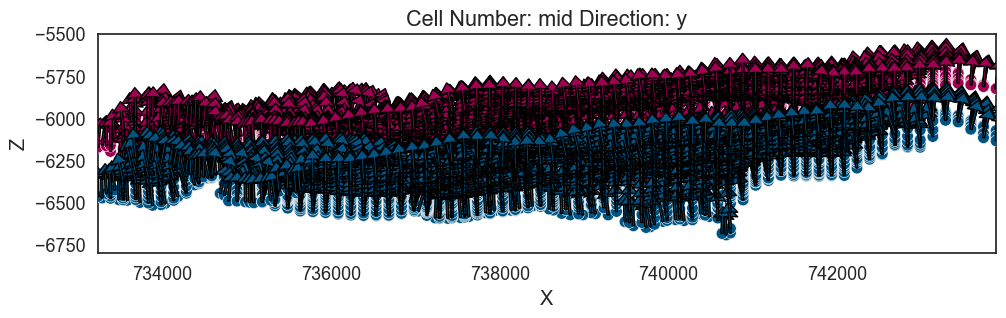

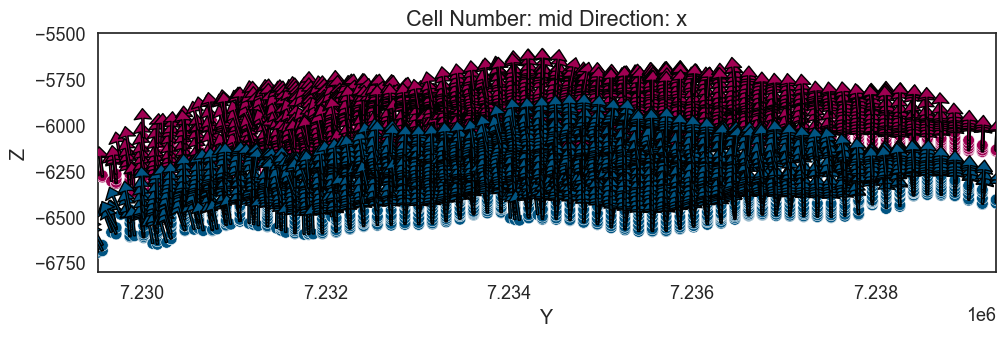

In [11]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [12]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              14531.09
$C_o$            5027440.48
drift equations   [3, 3, 3]
CPU times: total: 17.5 s
Wall time: 18.1 s


In [13]:
geo_model.update_to_interpolator()

True

In [14]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 49min 35s
Wall time: 7min 41s



Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

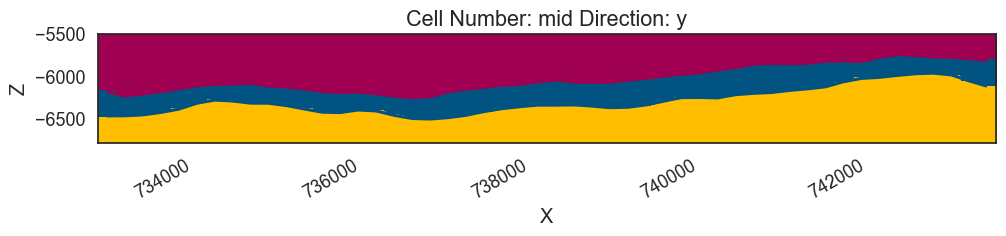

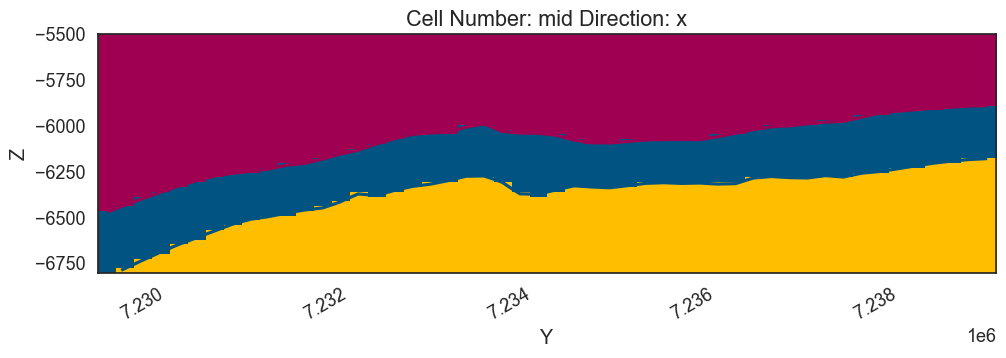

In [20]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [21]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [22]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

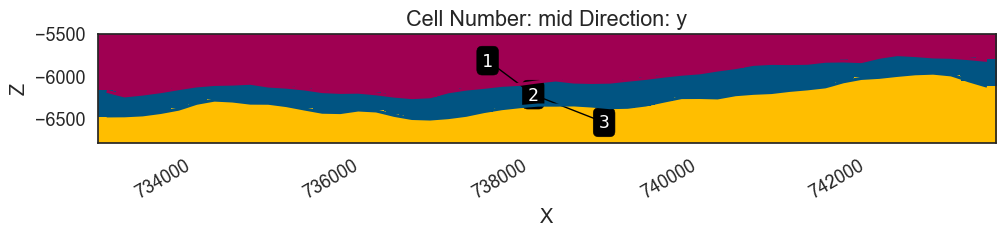

In [23]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

In [ ]:
import pickle
save_path = "../../../output/Santos_Basin/sismicas_interpretadas/horizontes_interpolados/"
with open(save_path + nome_modelo, "wb") as f:
    pickle.dump(geo_model, f)

In [24]:
simulated_toc = pd.read_csv("./synthetic_toc_data.csv")
print(simulated_toc.head())

  Well_ID          X         Y        Z    TOC
0  WELL_1  737222.49  7.23e+06 -6800.00  11.12
1  WELL_1  737222.49  7.23e+06 -6655.56   6.62
2  WELL_1  737222.49  7.23e+06 -6511.11   8.37
3  WELL_1  737222.49  7.23e+06 -6366.67   9.33
4  WELL_1  737222.49  7.23e+06 -6222.22  10.45


In [25]:
cond_data = simulated_toc[['X', 'Y', 'Z', 'TOC']].values

In [49]:
points_rg = geo_model.solutions.grid.get_grid("regular")
points_rg

array([[ 7.33340140e+05,  7.22961538e+06, -6.78700000e+03],
       [ 7.33340140e+05,  7.22961538e+06, -6.76100000e+03],
       [ 7.33340140e+05,  7.22961538e+06, -6.73500000e+03],
       ...,
       [ 7.43777140e+05,  7.23921938e+06, -5.56500000e+03],
       [ 7.43777140e+05,  7.23921938e+06, -5.53900000e+03],
       [ 7.43777140e+05,  7.23921938e+06, -5.51300000e+03]])

In [50]:
lith_block = geo_model.solutions.lith_block
lith_block

array([2., 2., 2., ..., 1., 1., 1.])

In [51]:
resolution = geo_model.grid.regular_grid.resolution
resolution

array([50, 50, 50])

In [ ]:
lith_block_k = np.full((resolution[0], resolution[1], resolution[2]), np.nan)
lith_block_k

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [53]:
formation_mask = lith_block == 2
formation_mask 

array([ True,  True,  True, ..., False, False, False])

In [54]:
formation_points = points_rg[formation_mask]
formation_points

array([[ 7.33340140e+05,  7.22961538e+06, -6.78700000e+03],
       [ 7.33340140e+05,  7.22961538e+06, -6.76100000e+03],
       [ 7.33340140e+05,  7.22961538e+06, -6.73500000e+03],
       ...,
       [ 7.43777140e+05,  7.23921938e+06, -5.92900000e+03],
       [ 7.43777140e+05,  7.23921938e+06, -5.90300000e+03],
       [ 7.43777140e+05,  7.23921938e+06, -5.87700000e+03]])

In [55]:
model = gs.Gaussian(dim=3,var=np.var(simulated_toc['TOC']),len_scale=[100, 100, 100])
model

Gaussian(dim=3, var=8.32, len_scale=1e+02, nugget=0.0)

In [56]:
krig = gs.krige.Universal(
        model,
        simulated_toc[['X', 'Y', 'Z']].values,
        simulated_toc['TOC'].values,
        drift_functions='linear'
    )
krig

Universal(model=Gaussian, cond_no=100)

In [57]:
toc_values, toc_var = krig(formation_points, return_var=True)
print(toc_values, toc_var)

[10.90143822  9.99274016 11.0286217  ... 10.03968956 11.11833144
 10.94826128] [9.14228691 8.9428772  8.64910242 ... 8.64411519 9.60340681 8.67928171]


In [59]:
full_toc = np.full((resolution[0], resolution[1], resolution[2]), np.nan)
full_var = np.full((resolution[0], resolution[1], resolution[2]), np.nan)
print(full_toc.shape)
print(full_var.shape)

(50, 50, 50)
(50, 50, 50)


In [46]:
shape = geo_model.grid.regular_grid.resolution
full_toc = np.full(shape, np.nan)
full_var = np.full(shape, np.nan)

In [60]:
x_rg = geo_model.grid.regular_grid.x
y_rg = geo_model.grid.regular_grid.y
z_rg = geo_model.grid.regular_grid.z

In [61]:
formation_point_idx = 0
for idx, (x, y, z) in enumerate(points_rg):
    if formation_mask[idx]:
        is_x = x == x_rg
        is_y = y == y_rg
        is_z = z == z_rg
        
        full_toc[is_x, is_y, is_z] = toc_values[formation_point_idx]
        full_var[is_x, is_y, is_z] = toc_var[formation_point_idx]
        formation_point_idx += 1

In [ ]:
full_toc = np.swapaxes(full_toc, 0, 2)

array([[[10.90143822, 10.94084141, 11.01021762, ...,         nan,
                 nan,         nan],
        [10.90258433, 10.94198752, 11.01307305, ...,         nan,
                 nan,         nan],
        [10.90247909, 10.94234072,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 9.99274016, 10.01745511, 10.88760991, ...,         nan,
                 nan,         nan],
        [ 9.99388664, 10.02030143, 10.88842156, ...,         nan,
                 nan,         nan],
        [ 9.99319876, 10.01892566, 10.88956767, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [63]:
full_var = np.swapaxes(full_var, 0, 2)

In [64]:
formation_mask_reshaped = formation_mask.reshape(resolution).swapaxes(0, 2)

In [77]:
lith_block_k = np.full((resolution[0], resolution[1], resolution[2]), np.nan)
for idx, (x, y, z) in enumerate(points_rg):
    is_x = x == x_rg
    is_y = y == y_rg
    is_z = z == z_rg
    lith_block_k[is_x, is_y, is_z] = lith_block[idx]

ValueError: shape mismatch: value array of shape (50,50) could not be broadcast to indexing result of shape (1,)

In [65]:
import xarray as xr
ds = xr.Dataset(
    {
        'TOC': (('nz', 'ny', 'nx'), full_toc),
        'TOC_variance': (('nz', 'ny', 'nx'), full_var),
        'formation_mask': (('nz', 'ny', 'nx'), formation_mask_reshaped)
    },
    coords={
        'x': x_rg,
        'y': y_rg,
        'z': z_rg
    }
)
ds

<xarray.Dataset> Size: 2MB
Dimensions:         (nz: 50, ny: 50, nx: 50, x: 50, y: 50, z: 50)
Coordinates:
  * x               (x) float64 400B 7.333e+05 7.336e+05 ... 7.436e+05 7.438e+05
  * y               (y) float64 400B 7.23e+06 7.23e+06 ... 7.239e+06 7.239e+06
  * z               (z) float64 400B -6.787e+03 -6.761e+03 ... -5.513e+03
Dimensions without coordinates: nz, ny, nx
Data variables:
    TOC             (nz, ny, nx) float64 1MB 10.9 10.94 11.01 ... nan nan nan
    TOC_variance    (nz, ny, nx) float64 1MB 9.142 8.721 8.686 ... nan nan nan
    formation_mask  (nz, ny, nx) bool 125kB True True True ... False False False

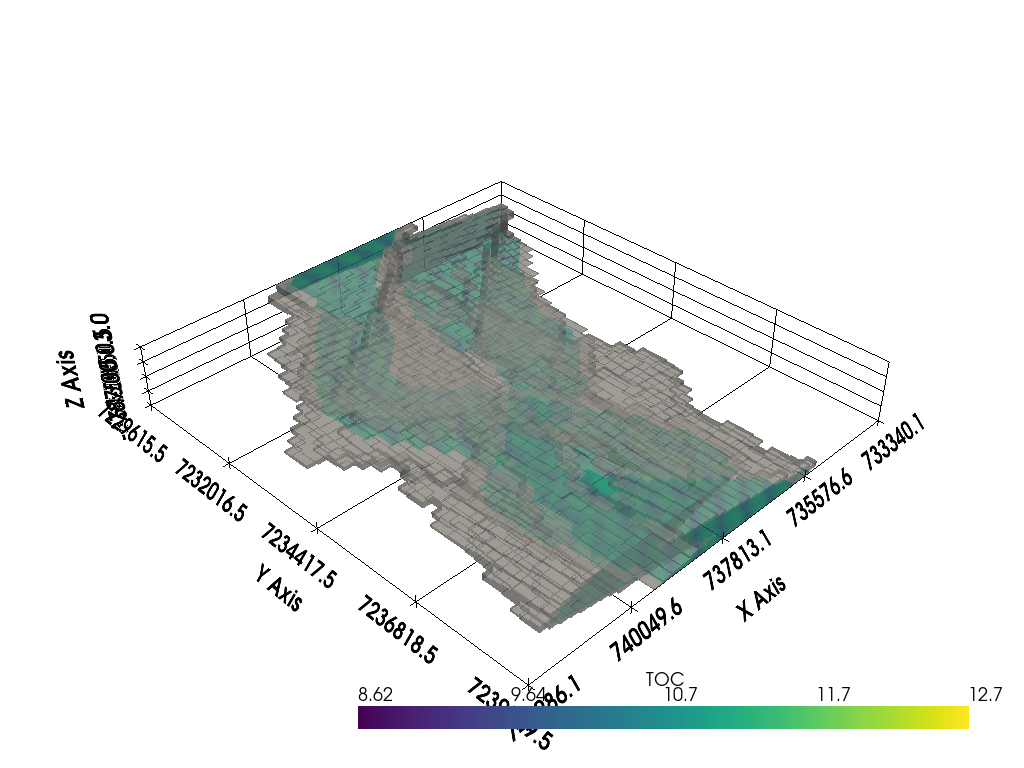

In [67]:
import pyvista as pv

# Create grid
grid = pv.UniformGrid()
grid.dimensions = [ds.dims['nx'], ds.dims['ny'], ds.dims['nz']]
grid.origin = [ds.x.min(), ds.y.min(), ds.z.min()]
grid.spacing = [
    (ds.x.max() - ds.x.min()) / (ds.dims['nx'] - 1),
    (ds.y.max() - ds.y.min()) / (ds.dims['ny'] - 1),
    (ds.z.max() - ds.z.min()) / (ds.dims['nz'] - 1)
]

# Add TOC data
grid.point_data["TOC"] = ds.TOC.values.flatten(order='F')

# Create plotter
p = pv.Plotter()
p.add_mesh(grid.threshold(), scalars="TOC", cmap="viridis",
           show_edges=False, opacity=0.7)
p.show_grid()
p.show()

In [72]:
import pyvista as pv
import pyvistaqt as pvqt

# Create grid
grid = pv.UniformGrid()
grid.dimensions = [ds.dims['nx'], ds.dims['ny'], ds.dims['nz']]
grid.origin = [ds.x.min(), ds.y.min(), ds.z.min()]
grid.spacing = [
    (ds.x.max() - ds.x.min()) / (ds.dims['nx'] - 1),
    (ds.y.max() - ds.y.min()) / (ds.dims['ny'] - 1),
    (ds.z.max() - ds.z.min()) / (ds.dims['nz'] - 1)
]

# Add TOC data
grid.point_data["TOC"] = ds.TOC.values.flatten(order='F')

# Create interactive plotter
p = pvqt.BackgroundPlotter()
p.add_mesh(grid.threshold(), scalars="TOC", cmap="viridis",
           show_edges=False, opacity=0.7)
p.show_grid()
p.set_background('white')
p.show_bounds(grid='front', location='outer', all_edges=True)
p.view_isometric()  # Optional: start with isometric view
p.show()

In [73]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,TOPO_ITAPEMA,Strat_Series_1,1,False,False,True,True,#9f0052,"[[[733340.14, 7229615.38, -6418.785701751709],...","[[[2, 1, 0], [3, 1, 2], [6, 5, 4], [6, 4, 7], ...",0.97,1
0,BASE_ITAPEMA,Strat_Series_2,1,False,False,True,True,#015482,"[[[733553.14, 7230142.874830131, -6787.0], [73...","[[[2, 1, 0], [5, 4, 3], [5, 3, 6], [2, 5, 6], ...",0.85,2
2,basement,Basement_series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [78]:
points_rg = geo_model.solutions.grid.get_grid("regular")
lith_block = geo_model.solutions.lith_block
resolution = geo_model.grid.regular_grid.resolution
x_rg = geo_model.grid.regular_grid.x
y_rg = geo_model.grid.regular_grid.y
z_rg = geo_model.grid.regular_grid.z

In [79]:
simulated_toc = pd.read_csv("./synthetic_toc_data.csv")

In [80]:
lith_block_k = np.full((resolution[0], resolution[1], resolution[2]), np.nan)
for idx, (x, y, z) in enumerate(points_rg):
    is_x = x == x_rg
    is_y = y == y_rg
    is_z = z == z_rg
    lith_block_k[is_x, is_y, is_z] = lith_block[idx]

# Create formation mask for target formation (assuming ID 2)
formation_mask = lith_block == 2
formation_points = points_rg[formation_mask]

In [81]:
model = gs.Gaussian(
    dim=3,
    var=np.var(simulated_toc['TOC']),
    len_scale=[100, 100, 100]
)

krig = gs.krige.Universal(
    model,
    simulated_toc[['X', 'Y', 'Z']].values,
    simulated_toc['TOC'].values,
    drift_functions='linear'
)

# Perform kriging on formation points
toc_values, toc_var = krig(formation_points, return_var=True)

# Initialize arrays for TOC and variance
full_toc = np.full((resolution[0], resolution[1], resolution[2]), np.nan)
full_var = np.full((resolution[0], resolution[1], resolution[2]), np.nan)

# Fill TOC and variance arrays
formation_point_idx = 0
for idx, (x, y, z) in enumerate(points_rg):
    if formation_mask[idx]:
        is_x = x == x_rg
        is_y = y == y_rg
        is_z = z == z_rg
        
        full_toc[is_x, is_y, is_z] = toc_values[formation_point_idx]
        full_var[is_x, is_y, is_z] = toc_var[formation_point_idx]
        formation_point_idx += 1

# Swap axes to match format
full_toc = np.swapaxes(full_toc, 0, 2)
full_var = np.swapaxes(full_var, 0, 2)
lith_block_k = np.swapaxes(lith_block_k, 0, 2)
formation_mask_reshaped = formation_mask.reshape(resolution).swapaxes(0, 2)

# Create xarray Dataset
ds = xr.Dataset(
    {
        'TOC': (('nz', 'ny', 'nx'), full_toc),
        'TOC_variance': (('nz', 'ny', 'nx'), full_var),
        'formation_mask': (('nz', 'ny', 'nx'), formation_mask_reshaped),
        'lith_block': (('nz', 'ny', 'nx'), lith_block_k)
    },
    coords={
        'x': x_rg,
        'y': y_rg,
        'z': z_rg
    }
)


In [82]:
ds

<xarray.Dataset> Size: 3MB
Dimensions:         (nz: 50, ny: 50, nx: 50, x: 50, y: 50, z: 50)
Coordinates:
  * x               (x) float64 400B 7.333e+05 7.336e+05 ... 7.436e+05 7.438e+05
  * y               (y) float64 400B 7.23e+06 7.23e+06 ... 7.239e+06 7.239e+06
  * z               (z) float64 400B -6.787e+03 -6.761e+03 ... -5.513e+03
Dimensions without coordinates: nz, ny, nx
Data variables:
    TOC             (nz, ny, nx) float64 1MB 10.9 10.94 11.01 ... nan nan nan
    TOC_variance    (nz, ny, nx) float64 1MB 9.142 8.721 8.686 ... nan nan nan
    formation_mask  (nz, ny, nx) bool 125kB True True True ... False False False
    lith_block      (nz, ny, nx) float64 1MB 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0

In [ ]:
# Visualize results
# Create grid for PyVista
grid = pv.UniformGrid()
grid.dimensions = [ds.dims['nx'], ds.dims['ny'], ds.dims['nz']]
grid.origin = [ds.x.min(), ds.y.min(), ds.z.min()]
grid.spacing = [
    (ds.x.max() - ds.x.min()) / (ds.dims['nx'] - 1),
    (ds.y.max() - ds.y.min()) / (ds.dims['ny'] - 1),
    (ds.z.max() - ds.z.min()) / (ds.dims['nz'] - 1)
]

# Combine lithology and TOC data for visualization
combined_values = ds.lith_block.values.copy()
combined_values[formation_mask_reshaped] = ds.TOC.values[formation_mask_reshaped]

# Add data to grid
grid.point_data["values"] = combined_values.flatten(order='F')

# Create interactive plotter
p = pvqt.BackgroundPlotter()
p.add_mesh(grid, scalars="values", cmap="viridis",
           show_edges=False, opacity=0.7)
p.show_grid()
p.set_background('white')
p.show_bounds(grid='front', location='outer', all_edges=True)
p.set_scale(zscale=5)  # Vertical exaggeration
p.view_isometric()
p.show()

In [85]:
import pyvista as pv
import pyvistaqt as pvqt

# Create grid
grid = pv.UniformGrid()
grid.dimensions = [ds.dims['nx'], ds.dims['ny'], ds.dims['nz']]
grid.origin = [ds.x.min(), ds.y.min(), ds.z.min()]
grid.spacing = [
    (ds.x.max() - ds.x.min()) / (ds.dims['nx'] - 1),
    (ds.y.max() - ds.y.min()) / (ds.dims['ny'] - 1),
    (ds.z.max() - ds.z.min()) / (ds.dims['nz'] - 1)
]

# Add TOC data
grid.point_data["TOC"] = ds.TOC.values.flatten(order='F')

# Create interactive plotter
p = pvqt.BackgroundPlotter()
p.add_mesh(grid.threshold(), scalars="TOC", cmap="viridis",
           show_edges=False, opacity=0.7)
p.show_grid()
p.set_background('white')
p.show_bounds(grid='front', location='outer', all_edges=True)
p.view_isometric()  # Optional: start with isometric view
p.show()